In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/My Drive/salaries.csv')

In [4]:
#describing dataset: first 5 lines of data
print(df.head())

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500


In [5]:
#getting info on the data (datatype...)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB
None


In [6]:
#most important summaries of data (mean, std, median...)
print(df.describe())

       yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000


In [7]:
#check if there is any missing data: there is none as all variables say 0
print(df.isnull().sum())

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [8]:
#convert caterogical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

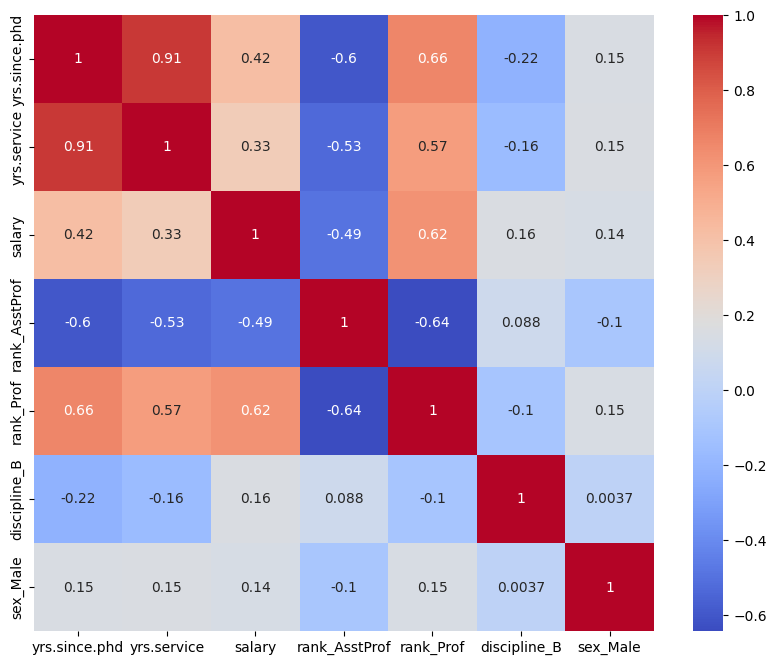

In [10]:
#correlation matrix visualizing relationship between variables (the higher the value, the stronger the correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
#print out the names of the different columns
print(df.columns)

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof',
       'discipline_B', 'sex_Male'],
      dtype='object')


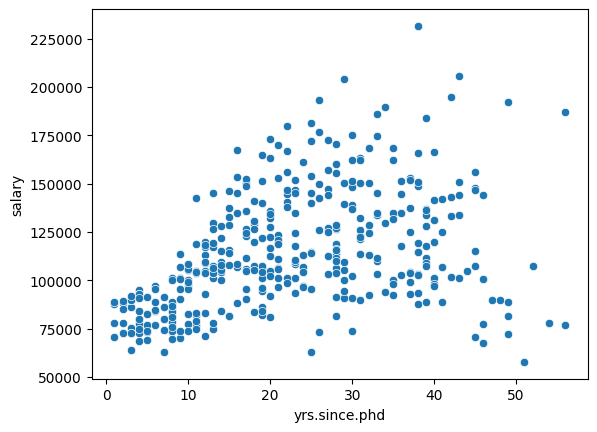

In [12]:
#create scatterplot
sns.scatterplot(x='yrs.since.phd', y='salary', data=df)
plt.show()

In [ ]:
#decided for this 2 variables because i thought there would be a nice visualization in a scatterplot, as both are numerical variables.
#One can see that the more years have passed since the phd, the higher the salary. Workers with higher experience earn more.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [14]:
#standardize numerical variables
scaler = StandardScaler()
numerical_cols = ['yrs.since.phd', 'yrs.service', 'rank_Prof']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
#set independent and dependent variables
X = df.drop(['yrs.since.phd', 'yrs.service', 'rank_AsstProf', 'rank_Prof', 'discipline_B', 'sex_Male'], axis=1)
y = df['salary']

In [16]:
#divide into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#this code creates the regression
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.723e+33
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:29:43   Log-Likelihood:                 7613.7
No. Observations:                 317   AIC:                        -1.522e+04
Df Residuals:                     315   BIC:                        -1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.567e-11   1.94e-12    -18.411      0.0

In [ ]:
#huge overfitting of the model. R squared of 1 means that variables explain independent variable perfectly which is not realistic. The p value
#is 0, which means that the result is significant. The f-Value is extremely high, which means a high significance of the model but not realistic.

In [19]:
#evaluate model performance
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [20]:
#check for mean absolute error and root mean squared error.
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 5.093170329928398e-12, RMSE: 8.911191772433732e-12


In [ ]:
#both are extremely low. This means that we have a perfect model. Once again this is not realistic in praxis and means that our model
#is probably overfitting

In [21]:
#check which are the significant variables without constant
significant_features = sm_model.pvalues[sm_model.pvalues < 0.05].index.drop('const')

In [22]:
#train and test significant variables
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

In [23]:
model.fit(X_train_significant, y_train)
predictions = model.predict(X_test_significant)

In [24]:
X_train_significant = sm.add_constant(X_train_significant)
new_model = sm.OLS(y_train, X_train_significant).fit()

In [25]:
#print out new model with significant variables. no differences, still overfitting.
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.723e+33
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:30:02   Log-Likelihood:                 7613.7
No. Observations:                 317   AIC:                        -1.522e+04
Df Residuals:                     315   BIC:                        -1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.567e-11   1.94e-12    -18.411      0.0

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
#train regression tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
#check what is the relative contribution of every variable for the prediction of the model
importances = tree_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))
#result means that only the variable salary contributes to the prediction

  Feature  Importance
0  salary         1.0


In [31]:
#calculate predictions on the test data
tree_predictions = tree_model.predict(X_test)

In [32]:
#once again, I calculate mean absolute error and root mean square error
mae_tree = mean_absolute_error(y_test, tree_predictions)
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_predictions))

In [35]:
print(f"MAE: {mae_tree}, RMSE: {rmse_tree}")
#on average, predictions of the salary deviate by 278.875 money units
#high rmse means that the model might have problems with predicting extreme values

MAE: 278.875, RMSE: 699.8925096041535


In [ ]:
#since I got just one variable here, it doesnt really make sence to refine the model using just the most important features (just 1)

In [39]:
#import libraries for random forrest regression
from sklearn.ensemble import RandomForestRegressor

In [40]:
#create and train model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
rf_predictions = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))

In [43]:
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")
#errors even higher than of the previous model

Random Forest - MAE: 360.6930000000004, RMSE: 1079.2731344474412
